# AM 205 - Assignment 2
## By Jonathan Guillotte-Blouin

In [326]:
import numpy as np
import numpy.linalg as la
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import sys

$\newcommand{\N}{\mathbb{N}}
\newcommand{\Z}{\mathbb{Z}}
\newcommand{\Q}{\mathbb{Q}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\B}{\mathbb{B}}
\renewcommand{\P}{\mathbb{P}}
\newcommand{\p}{\partial}
\newcommand{\Trans}{\mathsf{T}}
\renewcommand{\vec}[1]{\mathbf{#1}}
\newcommand{\vx}{\vec{x}}
\newcommand{\vb}{\vec{b}}$

### Question 1: Norms and Newton root-finding

a) Find four points $b \in \R^2$ such that $||b||_2 = 1$ and $||Ab||_2=1$. Plot the two curves $||x||_2=1$ and $||Ax||_2=1$ and mark the points $b$ on this plot.

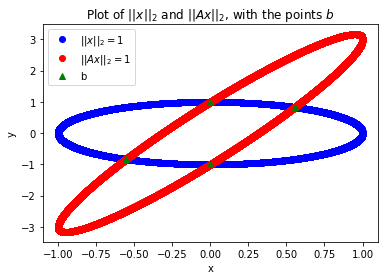

In [135]:
domain_1a = np.linspace(0,2*np.pi, 10000)

# generate the points using ellipse functions
domain_x1a = [np.cos(t) for t in domain_1a]
values_x1a = [np.sin(t) for t in domain_1a]
domain_Ax1a = [np.sin(t) for t in domain_1a]
values_Ax1a = [-np.cos(t) + 3 * np.sin(t) for t in domain_1a]
domain_intersect1a = [2/np.sqrt(13), -2/np.sqrt(13), 0, 0]
values_intersect1a = [3/np.sqrt(13), -3/np.sqrt(13), 1, -1]

plt.title(r'Plot of $||x||_2$ and $||Ax||_2$, with the points $b$')
plt.plot(domain_x1a, values_x1a, 'bo', label=r'$||x||_2 = 1$', linestyle='None')
plt.plot(domain_Ax1a, values_Ax1a, 'ro', label=r'$||Ax||_2 = 1$', linestyle='None')
plt.plot(domain_intersect1a, values_intersect1a, 'g^', label='b', linestyle='None');
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

##### How did I find the four points $b$?

We have
$A = \left[\begin{array}{cc}
	3 & -1 \\
	1 & 0
      \end{array}\right]$
and
$b = \left[\begin{array}{c}
	x \\
	y
      \end{array}\right]$. By the constraints of the problem, we can infer these two equations:
      
1. $x^2 + y^2 = 1$ (because $||b||_2 = 1$)
2. $10x^2 - 6xy + y^2 = 1$ (because $||Ab||_2 = 1$)

$$x^2 + y^2 = 10x^2 - 6xy + y^2$$
$$9x^2 - 6xy = 0$$
$$3x(3x - 2y) = 0$$

We have two possibilities to satisfy the system

Case 1. $3x = 0$ (therefore $x = 0$)

Case 2. $3x - 2y = 0$ (therefore $x = \frac{2}{3}y$)

Given equation 1, we know that $y = \sqrt{1 - x^2}$. If $x=0$ (case 1), then we have two points: $(0,1)$ and $(0,-1)$. For the second case,

$$x^2 + y^2 = (\frac{2}{3}y)^2 + y^2 = \frac{4}{9}y^2 + y^2 = \frac{13}{9}y^2 = 1$$
$$y = \sqrt{\frac{9}{13}} = \frac{3}{\sqrt{13}}$$

If $y = \frac{3}{\sqrt{13}}$, then we know that $x = \frac{2}{3}y = \frac{2}{\sqrt{13}}$. We therefore have two new points: $(\frac{2}{\sqrt{13}}, \frac{3}{\sqrt{13}})$ and $(-\frac{2}{\sqrt{13}}, -\frac{3}{\sqrt{13}})$.

To restate: our four points are $(0,1)$, $(0,-1)$, $(\frac{2}{\sqrt{13}}, \frac{3}{\sqrt{13}})$, and $(-\frac{2}{\sqrt{13}}, -\frac{3}{\sqrt{13}})$.

In [87]:
np.linalg.norm(np.matrix([[-2],[1]]), np.inf)

2.0

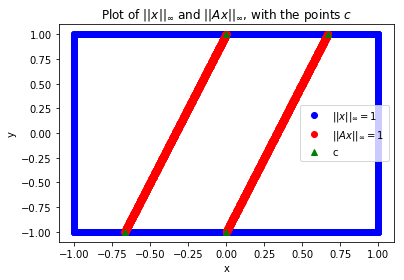

In [137]:
domain_1b = np.linspace(-1,1, 1000)

domain_x1b = []
values_x1b = []
domain_Ax1b = []
values_Ax1b = []
for x in domain_1b:
    if abs(x) != 1:
        domain_x1b += [x, x]
        values_x1b += [1, -1]
    else:
        domain_x1b += [x] * 1000
        values_x1b += [x for x in domain_1b]
        
    for y in domain_1b:
        if abs(max(abs(3*x - y), abs(x)) - 1) < 0.01: # I use an epsilon 0.01 here as an approximation measure
            domain_Ax1b.append(x)
            values_Ax1b.append(y)
domain_intersect1b = [2/3, -2/3, 0, 0]
values_intersect1b = [1, -1, 1, -1]     
        
plt.title(r'Plot of $||x||_\infty$ and $||Ax||_\infty$, with the points $c$')
plt.plot(domain_x1b, values_x1b, 'bo', label=r'$||x||_\infty = 1$', linestyle='None')
plt.plot(domain_Ax1b, values_Ax1b, 'ro', label=r'$||Ax||_\infty = 1$', linestyle='None')
plt.plot(domain_intersect1b, values_intersect1b, 'g^', label='c', linestyle='None');
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

##### How did I find the four points $c$?

We have
$A = \left[\begin{array}{cc}
	3 & -1 \\
	1 & 0
      \end{array}\right]$
and
$c = \left[\begin{array}{c}
	x \\
	y
      \end{array}\right]$. By the constraints of the problem, we can infer these two equations (with corresponding conditions):
      
1. $||c||_\infty = \texttt{max}(|x|, |y|) = 1 \implies -1 \leq x \leq 1, -1 \leq y \leq 1, (x = \pm1 \, \texttt{OR} \, y = \pm1)$
2. $||Ac||_\infty = \texttt{max}(|3x-y|, |x|) = 1 \implies -1 \leq 3x - y \leq 1, -1 \leq x \leq 1, (x = \pm1 \, \texttt{OR} \, 3x - y = \pm1)$

If $x = 1$, then (second equation) $|3x-y| = |3-y| \leq 1$, but that is impossible considering that $|y| \leq 1$ (equation 1). So, $|3x-y|$ must be equal to 1.


If $y = 1$, then $|3x - 1| = 1 \implies x = \frac{2}{3}, x = 0$. These two points satisfy all of our conditions, so $(\frac{2}{3}, 1)$ and $(0, 1)$ are our first two points.

If $y = -1$, then $|3x + 1| = 1 \implies x = -\frac{2}{3}, x = 0$. These two points satisfy all of our conditions, so $(-\frac{2}{3}, -1)$ and $(0, -1)$ are our last two points.

To restate: our four points are $(\frac{2}{3}, 1)$, $(0, 1)$, $(-\frac{2}{3}, -1)$, and $(0, -1)$.

### Question 2: LU factorization for binary numbers

a) Write a function `fsolve`.



In [160]:
def is_not_binary_matrix(A):
    return np.any(A < 0) or np.any(A > 1)

def fsolve(L, b, no_singular=True):
    # check L and B are binary
    if is_not_binary_matrix(L) or is_not_binary_matrix(b):
        print("We work with binary digits, L or b is not right!")
        sys.exit()
    
    # check L
    for i in range(len(L)):
        row = L[i]
        
        if no_singular and row[i] == 0:
            print("Diagonal element == 0; singular matrices are not accepted!")
            sys.exit()
        
        if np.any(row[i+1:] != 0):
            print("This is not a valid lower triangular matrix!")
            sys.exit()
    
    # check b
    if b.shape != (len(L), 1):
        print("b should be a vector of length {}".format(len(L)))
        sys.exit()

    # solve Lx = b
    x = np.zeros((len(b),1),dtype=np.int8)
    for i in range(len(L)):
        li_left = L[i][:i] # coefficients in L on the current row, but to the left of the diagonal
        summedTerms = 0
        for j in range(len(li_left)):
            summedTerms ^= li_left[j] & x[j][0] # += lij * xj0
            
        bi = b[i][0]
        xi = bi ^ summedTerms # no need to divide by lii, as it has to be "1s" on the diagonal
        x[i] = np.array([xi],dtype=np.int8)

    return x

l=np.array([[1,0,0,0],[0,1,0,0],[1,1,1,0],[1,0,1,1]],dtype=np.int8)
b=np.array([[1,],[1],[0],[0]],dtype=np.int8)

fsolve(l,b)

array([[1],
       [1],
       [0],
       [1]], dtype=int8)

b) Write a function `rsolve`.

In [151]:
def rsolve(L, b, no_singular=True):
    # check L and B are binary
    if is_not_binary_matrix(L) or is_not_binary_matrix(b):
        print("We work with binary digits, L or b is not right!")
        sys.exit()
    
    # check L
    for i in range(len(L)):
        row = L[i]
        
        if no_singular and row[i] == 0:
            print("Diagonal element == 0; singular matrices are not accepted!")
            sys.exit()
        
        if np.any(row[:i] != 0):
            print("This is not a valid upper triangular matrix!")
            sys.exit()
    
    # check b
    if b.shape != (len(L), 1):
        print("b should be a vector of length {}".format(len(L)))
        sys.exit()

    # solve Lx = b
    x = np.zeros((len(b),1),dtype=np.int8)
    for i in reversed(range(len(L))):
        li_right = L[i][i+1:] # coefficients in L on the current row, but to the right of the diagonal
        summedTerms = 0
        for j in range(len(li_right)):
            summedTerms ^= li_right[j] & x[i+j+1][0] # we need to do x[i+j+1] to get the right index in `x`, because `li_right` is dephased
            
        bi = b[i][0]
        xi = bi ^ summedTerms # no need to divide by lii, as it has to be "1s" on the diagonal
        x[i] = np.array([xi],dtype=np.int8)

    return x

u=np.array([[1,1,1,1],[0,1,1,1],[0,0,1,1],[0,0,0,1]],dtype=np.int8)

rsolve(u,b)

array([[0],
       [1],
       [0],
       [0]], dtype=int8)

c) Write a program to calculate the LU factorization with partial pivoting.

In [252]:
def findPivot(col, extra):
    for i in range(len(col)):
        if col[i] == 1:
            return i+extra, False
    else:
        return 0, True

def swap(A, i, j):
    tmp = np.copy(A[i])
    A[i] = A[j]
    A[j] = tmp
    
def get_PLU(A):
    P = np.identity(len(A),dtype=np.int8)
    L = np.zeros((len(A),len(A)),dtype=np.int8)
    U = np.copy(A)
    
    for i in range(len(A) - 1): # -1 because there's nothing to do on the last row
        pivotIndex, err = findPivot(A[i:,i], i) # add i to keep track of the right row
        if err:
            continue

        # do we swap rows?
        if pivotIndex != i:
            swap(P, i, pivotIndex)
            swap(U, i, pivotIndex)
            swap(L, i, pivotIndex)
        
        # reduce
        pivot, pivotRow = U[i][i], U[i][i:]
        underneath = U[i+1:,i:] # sub-matrix underneath the pivotRow, ignoring what's to the left too
        for j in range(len(underneath)):
            underneath_row = underneath[j]
            multiplier = 0

            for k in range(len(underneath_row)):
                currCell = underneath_row[k]
                
                # calculate row's multiplier if in column under the pivot
                if k == 0:
                    multiplier = 0 if currCell == 0 else 1
                    
                    # update L and the current cell, if multiplier is not 0
                    if multiplier == 1:
                        L[i+j+1][i] = 1
                        U[i+1+j][i] = 0                
                elif multiplier == 1:
                    U[i+j+1][i+k] ^= pivotRow[k] # do the difference
    
    # add the '1s' on the diagonal of L
    for i in range(len(L)):
        L[i][i] = 1

    return (P, L, U)

A1 = np.array([[1,0,0,1],[1,1,0,0],[0,1,1,1],[1,0,1,0]],dtype=np.int8)
get_PLU(A1)

(array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]], dtype=int8), array([[1, 0, 0, 0],
        [1, 1, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 1, 1]], dtype=int8), array([[1, 0, 0, 1],
        [0, 1, 0, 1],
        [0, 0, 1, 0],
        [0, 0, 0, 1]], dtype=int8))

d) Find the solutions $x$ to both linear systems (small and large)

In [161]:
# taken from the files
def bin_mul(c,d):
    # Check that the dimensions of the matrices are compatible
    (m,n)=c.shape
    (nn,p)=d.shape
    if n!=nn:
        print("Matrix size mismatch")
        sys.exit()

    # Initalize blank matrix of integer zeros
    e=np.zeros((m,p),dtype=np.int8)

    # Calculate each term, using "&" instead of "*" and "^" instead of "+"
    for i in range(m):
        for j in range(p):
            for k in range(n):
                e[i,j]=e[i,j]^(c[i,k]&d[k,j])
    return e

def LU(A, b, no_singular=True):
    P, L, U = get_PLU(A)
    
    pb = bin_mul(P, b)
    y = fsolve(L, pb, no_singular)
    return (P, L, U, rsolve(U, y, no_singular))

b1 = np.array([[1],[1],[0]],dtype=np.int8)
LU(A1, b1)

(array([[0, 1, 0],
        [0, 0, 1],
        [1, 0, 0]], dtype=int8), array([[1, 0, 0],
        [1, 1, 0],
        [0, 0, 1]], dtype=int8), array([[1, 0, 0],
        [0, 1, 1],
        [0, 0, 1]], dtype=int8), array([[1],
        [0],
        [1]], dtype=int8))

In [218]:
def read_file_into_matrix(path_to_file):
    with open(path_to_file) as f:
        content = f.readlines()
        return np.array([x.strip().split(" ") for x in content],dtype=np.int8)
        
A_small, b_small = read_file_into_matrix("a_small.txt"), read_file_into_matrix("b_small.txt")

print("Ax = b (for small)")
P_small, L_small, U_small, x_small = LU(A_small, b_small, no_singular=False)
print(x_small)
print("\n")

A_big, b_big = read_file_into_matrix("a_big.txt"), read_file_into_matrix("b_big.txt")

print("Ax = b (for big)")
P_big, L_big, U_big, x_big = LU(A_big, b_big, no_singular=False)
print(x_big)

Ax = b (for small)
[[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]]


Ax = b (for big)
[[1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]]


### Question 3: The light game

a) Write a program that creates a 49x49 binary matrix $A$ such that $Ax = b$

Text(0.5,1,'Representation of grid A: similar to the one on Piazza')

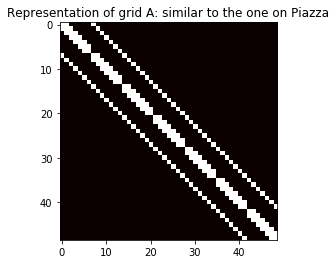

In [451]:
def gather_neighbours(i, j, m, n):
    neighbours = [i * n + j]
    
    if i - 1 >= 0:
        neighbours.append((i-1) * n + j)
    
    if j - 1 >= 0:
        neighbours.append(i * n + j - 1)
        
    if j + 1 < n:
        neighbours.append(i * n + j + 1)
        
    if i + 1 < m:
        neighbours.append((i+1) * n + j)
    
    return neighbours

def build_grid_A(m=7, n=7):
    A = np.zeros((m*n,m*n),dtype=np.int8)

    for i in range(m):
        for j in range(n):
            neighbours = gather_neighbours(i, j, m, n)
            
            for neighbour in neighbours:
                A[i*n+j][neighbour] = 1
                
    return A

gridA = build_grid_A()
plt.imshow(gridA, cmap='hot')
plt.title("Representation of grid A: similar to the one on Piazza")

b) For each of the patterns given below, use your binary LU solver from Question 2 to determine the correct presses.

Text(0.5,1.05,'Case 1')

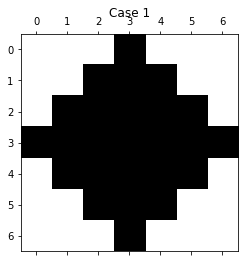

In [275]:
def build_vector_b(lits):
    b = np.zeros((49,1),dtype=np.int8)
    
    for lit in lits:
        b[lit] = 1
    
    return b

b1 = build_vector_b([3, 9, 10, 11, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 37, 38, 39, 45])
x1 = LU(gridA, b1, no_singular=False)[3]
plt.spy(b1.reshape((7,7)))
plt.title("Case 1")

Text(0.5,1.05,'Presses to render Case 1')

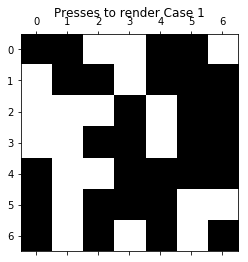

In [276]:
plt.spy(x1.reshape((7,7)))
plt.title("Presses to render Case 1")

Text(0.5,1.05,'Case 2')

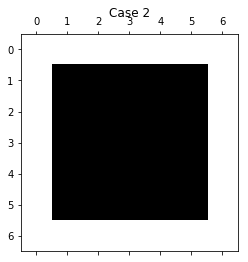

In [200]:
b2 = build_vector_b([i*7+j for i in range(7) for j in range(7) if (i != 0 and i != 6 and j != 0 and j != 6)])
x2 = LU(gridA, b2, no_singular=False)[3]
plt.spy(b2.reshape((7,7)))
plt.title("Case 2")

Text(0.5,1.05,'Presses to render Case 2')

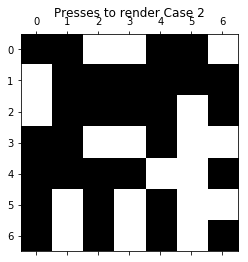

In [201]:
plt.spy(x2.reshape((7,7)))
plt.title("Presses to render Case 2")

Text(0.5,1.05,'Case 3')

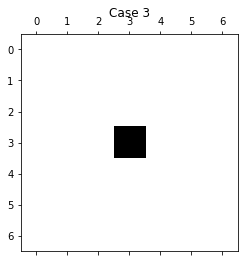

In [202]:
b3 = build_vector_b([24])
x3 = LU(gridA, b3, no_singular=False)[3]
plt.spy(b3.reshape((7,7)))
plt.title("Case 3")

Text(0.5,1.05,'Presses to render Case 3')

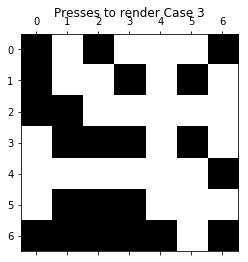

In [203]:
plt.spy(x3.reshape((7,7)))
plt.title("Presses to render Case 3")

Text(0.5,1.05,'Case 4')

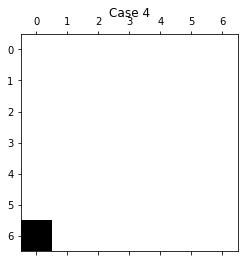

In [221]:
b4 = build_vector_b([42])
x4 = LU(gridA, b4, no_singular=False)[3]
plt.spy(b4.reshape((7,7)))
plt.title("Case 4")

Text(0.5,1.05,'Presses to render Case 4')

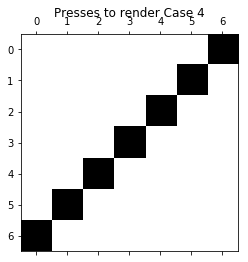

In [222]:
plt.spy(x4.reshape((7,7)))
plt.title("Presses to render Case 4")

Text(0.5,1.05,'Case 5')

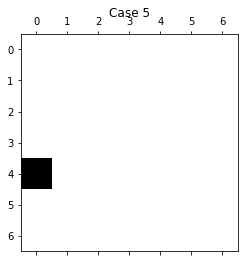

In [224]:
b5 = build_vector_b([28])
x5 = LU(gridA, b5, no_singular=False)[3]
plt.spy(b5.reshape((7,7)))
plt.title("Case 5")

Text(0.5,1.05,'Presses to render Case 5')

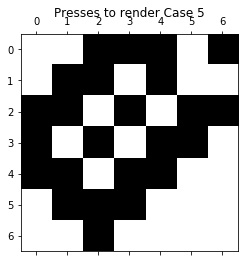

In [225]:
plt.spy(x5.reshape((7,7)))
plt.title("Presses to render Case 5")

Text(0.5,1.05,'Custom case')

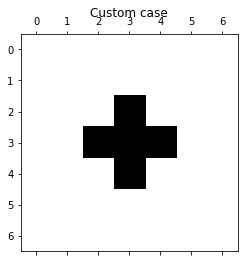

In [260]:
b_custom = build_vector_b([17,23,24,25,31])
x_custom = LU(gridA, b_custom, no_singular=False)[3]
plt.spy(b_custom.reshape((7,7)))
plt.title("Custom case")

Text(0.5,1.05,'Presses to render Custom case')

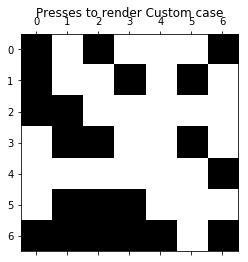

In [258]:
plt.spy(x_custom.reshape((7,7)))
plt.title("Presses to render Custom case")

**Note: there seems to be a bug when dealing with singular matrices**

In [237]:
A_test = read_file_into_matrix("test.txt")
b_test = read_file_into_matrix("b_test.txt")
print(np.linalg.det(A_test))
Ptest, Ltest, Utest = get_PLU(A_test)
print(Ptest)
print("")
print(Ltest)
print("")
print(Utest)
LU(A_test, b_test)[3]

-1.0
[[0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 0 1]]

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 1 0 1 0]
 [1 0 0 0 1]]

[[1 1 1 0 0]
 [0 1 0 1 1]
 [0 0 1 1 1]
 [0 0 0 1 0]
 [0 0 0 0 1]]


array([[1],
       [0],
       [0],
       [0],
       [1]], dtype=int8)

c) Determine the dimension of the null space for each $mxn$ grid with $m,n \in \{1,2,...,9\}$

In [286]:
for i in range(1,10):
    for j in range(1,10):
        rankA = np.linalg.matrix_rank(build_grid_A(i, j))
        dimNullSpace = i*j - rankA # according to problem description
        print("Dimension of null space of grid ({},{}): {}\n".format(i, j, dimNullSpace))

Dimension of null space of grid (1,1): 0

Dimension of null space of grid (1,2): 1

Dimension of null space of grid (1,3): 0

Dimension of null space of grid (1,4): 0

Dimension of null space of grid (1,5): 1

Dimension of null space of grid (1,6): 0

Dimension of null space of grid (1,7): 0

Dimension of null space of grid (1,8): 1

Dimension of null space of grid (1,9): 0

Dimension of null space of grid (2,1): 1

Dimension of null space of grid (2,2): 0

Dimension of null space of grid (2,3): 1

Dimension of null space of grid (2,4): 0

Dimension of null space of grid (2,5): 1

Dimension of null space of grid (2,6): 0

Dimension of null space of grid (2,7): 1

Dimension of null space of grid (2,8): 0

Dimension of null space of grid (2,9): 1

Dimension of null space of grid (3,1): 0

Dimension of null space of grid (3,2): 1

Dimension of null space of grid (3,3): 0

Dimension of null space of grid (3,4): 0

Dimension of null space of grid (3,5): 1

Dimension of null space of grid (3

### Question 4: Difficult cases for LU factorization

a) Write a function `generate_g` that returns $G_n$.

In [294]:
def generate_g(n):
    Gn = np.identity(n,dtype=np.int8)
    
    for i in range(n):
        for j in range(n):
            if i == j: # do nothing on the diagonal
                continue
                
            if i == n-1: # last row
                Gn[i][j] = -1                
            elif j == n-1: # last column
                Gn[i][j] = 1 
            elif j <  i: # lower triangle
                Gn[i][j] = -1
                
    return Gn

generate_g(9)

array([[ 1,  0,  0,  0,  0,  0,  0,  0,  1],
       [-1,  1,  0,  0,  0,  0,  0,  0,  1],
       [-1, -1,  1,  0,  0,  0,  0,  0,  1],
       [-1, -1, -1,  1,  0,  0,  0,  0,  1],
       [-1, -1, -1, -1,  1,  0,  0,  0,  1],
       [-1, -1, -1, -1, -1,  1,  0,  0,  1],
       [-1, -1, -1, -1, -1, -1,  1,  0,  1],
       [-1, -1, -1, -1, -1, -1, -1,  1,  1],
       [-1, -1, -1, -1, -1, -1, -1, -1,  1]], dtype=int8)

b) Measure time execution of `generate_g` for $n=10,20,...,1000$.

In [309]:
from time import time
ns = np.linspace(10, 1000, 100,dtype=np.int)
g_times = []
for n in ns:
    start_time = time()
    g = generate_g(n)
    elapsed_time = time() - start_time
    
    g_times.append(elapsed_time)

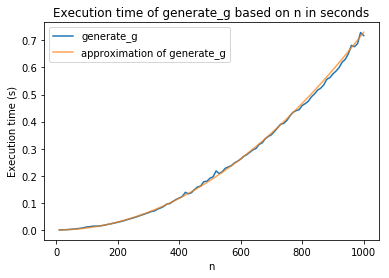

In [321]:
g_alpha = 0.00000073
g_beta = 2
g_approximation_times = []

for n in ns:
    g_approximation_times.append(g_alpha * n**g_beta)

plt.plot(ns, g_times, label="generate_g")
plt.plot(ns, g_approximation_times, alpha=0.7, label="approximation of generate_g")
plt.title("Execution time of generate_g based on n in seconds")
plt.ylabel("Execution time (s)")
plt.xlabel("n")
plt.legend()

As we can see on the graph, the approximation function is pretty much exactly the same as the real execution time of `generate_g`. The approximation function is $0.00000073 \cdot n^2$. So $\alpha=0.00000073$, and $\beta=2$.

The value of $\beta$ is quite reasonable: we build an identity matrix ($n^2$), then we do two nested loops of size n ($n^2$), where trivial operations occur inside ($1$). `generate_g` is therefore $O(n^2)$, which concurs with the value for $\beta$.

c) Solve the system $G_n\hat{x} = b$ using LU factorization. Plot the 2-norm relative error.

In [359]:
ns = np.linspace(10, 200, 20,dtype=np.int)
two_norm_errs = []

for n in ns:
    x = np.ones((n, 1),dtype=np.int)
    Gn = generate_g(n)
    b = Gn.dot(x)
    P, L, U = sp.linalg.lu(Gn)
    Pb = P.dot(b)
    y = sp.linalg.solve_triangular(L, Pb)
    x_hat = sp.linalg.solve_triangular(U, y)
    two_norm_errs.append(np.linalg.norm(x - x_hat, 2))

Text(0.5,0,'n')

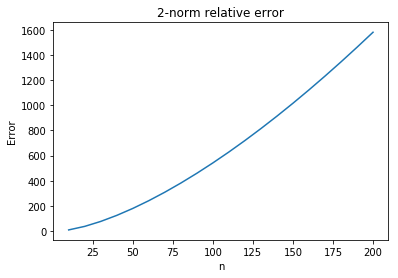

In [360]:
plt.plot(ns, two_norm_errs)
plt.title("2-norm relative error")
plt.ylabel("Error")
plt.xlabel("n")

Gaussian reduction requires a lot of multiplication and division of values resulting in $L$ and $U$. If $n$ grows, then errors are more probable to happen.

This topic has been studied in [this paper](http://www.math.sjsu.edu/~foster/geppfail.pdf). They state that the error growth, with significant $n$, even reaches an exponential trend!

### Question 5: QR factorization using Givens rotation, applied to a bouncing ball

a) Write a program that performs the QR factorization using Givens rotation

In [379]:
def build_givens(i, j, a1, a2, m):
    c, s = 0, 0
    if abs(a1) > abs(a2):
        t = a2/a1
        c = 1 / np.sqrt(1 + t**2)
        s = c * t
    else:
        tau = a1/a2
        s = 1 / np.sqrt(1 + tau**2)
        c = s * tau

    G = np.identity(m)    
    G[i][i] = c
    G[j][j] = c
    G[i][j] = s
    G[j][i] = -s
    
    return G

def QR(A):
    m, n = A.shape
    R = A.copy()
    Q = np.identity(m)
    
    for k in range(n):
        for j in reversed(range(k+1, m)):
            if R[j][k] == 0: # no need to anhilate an already null value
                continue
                
            G = build_givens(j, k, R[j][k], R[k][k], m)
            R = np.matmul(G,R)
            Q = np.matmul(Q, G.T)
            
    return (Q, R)

In [391]:
for i in range(10):
    A = np.random.randint(10, size=(11,7))
    Q, R = QR(A)
    A_app = np.matmul(Q, R)
    print("Trial {}: frobenius norm of `A - QR` = {}".format(i+1, np.linalg.norm(A_app - A, 'fro')))

Trial 1: frobenius norm of `A - QR` = 1.6395247537815725e-14
Trial 2: frobenius norm of `A - QR` = 1.0524608772637197e-14
Trial 3: frobenius norm of `A - QR` = 1.3187961241917077e-14
Trial 4: frobenius norm of `A - QR` = 1.1323061538706078e-14
Trial 5: frobenius norm of `A - QR` = 6.806468934929472e-15
Trial 6: frobenius norm of `A - QR` = 9.680109169485477e-15
Trial 7: frobenius norm of `A - QR` = 1.784763800369139e-14
Trial 8: frobenius norm of `A - QR` = 7.206643444970893e-15
Trial 9: frobenius norm of `A - QR` = 6.6316326555454424e-15
Trial 10: frobenius norm of `A - QR` = 5.894697882528171e-15


b)

i) Using your QR factorization code, fit each of the three different arcs.

In [442]:
def build_ball_A(times):
    A = np.ones((len(times),3))
    
    for i in range(len(times)):
        time = times[i]
        A[i][0], A[i][1] = time**2, time
    
    return A

# each arc in its row (values are currently pixels)
ball_ys = [[
    31.6452217364, 52.4041585445, 107.775599129, 197.422881356, 320.715789474, 337.955035971 # 6x1
], [
    236.268292683, 169.049204052, 136.072368421, 136.948700866, 171.529282577, 239.911519199, 341.876763876 # 7x1
], [
    339.846356453, 259.478021978, 213.351943463, 201.063214526, 222.523504274, 278.286053883, 369.234096692 # 7x1
]]

# change pixels to meters
for i in range(len(ball_ys)):
    ball_ys[i] = [(42.5 / 43.5) * y / 1000 for y in ball_ys[i]]

# time frames separated by arcs
ball_times = []
time_ctr = 0
for arc in ball_ys:
    time_arc = []
    
    for _ in arc:
        time_arc.append(time_ctr * 7 / 120)
        time_ctr += 1
        
    ball_times.append(time_arc)
    
ball_As = [build_ball_A(ball_time) for ball_time in ball_times]

"""
x = [alpha, beta, gamma]^T
"""

ball_alphas = []
ball_betas = []
ball_gammas = []
for i in range(len(ball_ys)):
    numF = len(ball_ys[i]) # how many frames in the arc
    Q, R = QR(ball_As[i])
    Qtb = np.matmul(Q.T, np.array(ball_ys[i]).reshape(numF,1))
    x = np.linalg.lstsq(R, Qtb, rcond=None)[0]
    
    alpha, beta, gamma = x[0][0], x[1][0], x[2][0]
    ball_alphas.append(alpha)
    ball_betas.append(beta)
    ball_gammas.append(gamma)
    print("For arc {}, we got:\nalpha={}\nbeta={}\ngamma={}\n".format(i+1, alpha, beta, gamma))
    print("From this approximated x, we would get the following times (b):\n{}\n\n".format(np.matmul(ball_As[i],x)))

For arc 1, we got:
alpha=1.3027504119335938
beta=0.7810228592039895
gamma=0.016103373553735346

From this approximated x, we would get the following times (b):
[[0.01610337]
 [0.06609601]
 [0.12495459]
 [0.19267911]
 [0.26926956]
 [0.35472596]]


For arc 2, we got:
alpha=4.854153804710756
beta=-4.801361203373702
gamma=1.3165387049133228

From this approximated x, we would get the following times (b):
[[0.23069612]
 [0.16534561]
 [0.13303031]
 [0.13375022]
 [0.16750534]
 [0.23429568]
 [0.33412123]]


For arc 3, we got:
alpha=4.899948144157956
beta=-9.065846281102392
gamma=4.389288922520125

From this approximated x, we would get the following times (b):
[[0.33216595]
 [0.25350765]
 [0.20819622]
 [0.19623167]
 [0.21761398]
 [0.27234316]
 [0.36041921]]




ii) Find

A) the gravitational acceleration $g$

We know that $y''(t) = 2 \cdot \alpha = a(t) = g$.

So our experimental acceleration would be:
$$g_1 = 1.3027504119335938 \cdot 2 = 2.6055008238671875 \frac{m}{s^2}$$
$$g_2 = 4.854153804710756 \cdot 2 = 9.708307609421512 \frac{m}{s^2}$$
$$g_3 = 4.899948144157956 \cdot 2 = 9.799896288315912 \frac{m}{s^2}$$

$g_2$ and $g_3$ are impressively close to the real value of $g$, which is $9.764\frac{m}{s^2} \leq g \leq 9.834 \frac{m}{2^2}$, according to [Wikipedia](https://en.wikipedia.org/wiki/Gravitational_acceleration).

$g_1$ is really not close: it could be explained by the fact that the ball is still in contact with the hand in the first frame or two, which could apply a force (hence, changing the acceleration) on the ball at that time.

If we ignore $g_1$, our $\hat{g}$ is $9.754101948868712 \frac{m}{s^2}$.

In [470]:
(9.708307609421512 + 9.799896288315912)/2

9.754101948868712

B) the height *h* at which the ball was dropped

First, I will find at which time $t$ the first and second arcs predict the same height. That point in time should be when the ball hits the table top. Then, I will compute the $y$ in the first equation to find the $\Delta y$ between time 0 and time $t$. Last step is to add the radius of the ball to the $\Delta y$.

In [456]:
diff_alpha = ball_alphas[0] - ball_alphas[1]
diff_beta = ball_betas[0] - ball_betas[1]
diff_gamma = ball_gammas[0] - ball_gammas[1]

ball_t = np.roots([diff_alpha, diff_beta, diff_gamma])[1] # [1.28746579, 0.28441537] ... by logic, we know that the first bounce has to be around 0.2~0.3s
ball_delta_y = ball_alphas[0] * ball_t**2 + ball_betas[0] * ball_t # gamma term is canceled by `ball_y0 = gamma`
print("The height h is {}mm".format(ball_delta_y * 1000 + 42.5/2)) # don't forget radius of the ball

The height h is 348.76712159674094mm


c) the coefficient of restitution *e*

At time $t$ previously computed, we want to compute $y_1'(t) = v_1(t)$ and compare it to $v_2(t)$. Reckon that $y'(t) = 2 \cdot \alpha t + \beta$.

In [469]:
ball_v1 = 2 * ball_alphas[0] * ball_t + ball_betas[0]
ball_v2 = 2 * ball_alphas[1] * ball_t + ball_betas[1]

print("Coefficient of restitution e is {} (first bounce)".format(abs(ball_v2/ball_v1)))

# let's compute `e` for the seond bounce too
diff_alpha2 = ball_alphas[1] - ball_alphas[2]
diff_beta2 = ball_betas[1] - ball_betas[2]
diff_gamma2 = ball_gammas[1] - ball_gammas[2]

ball_t2 = np.roots([diff_alpha2, diff_beta2, diff_gamma2])[1] # [92.39632966,  0.72620752] ... by logic, we take the second time
ball_v2t2 = 2 * ball_alphas[1] * ball_t2 + ball_betas[1]
ball_v3t2 = 2 * ball_alphas[2] * ball_t2 + ball_betas[2]

print("Coefficient of restitution e is {} (second bounce)".format(abs(ball_v3t2/ball_v2t2)))

Coefficient of restitution e is 1.3403936103528462 (first bounce)
Coefficient of restitution e is 0.8666908966664176 (second bounce)


Obviously, the first value of *e* makes no sense; it would assume that the ball had more energy after bouncing than before. This is due to the bad value of $\alpha_1$. The coefficient $e_2$ is reasonable.

In [245]:
# sing_matrix = np.zeros((5,5),dtype=np.int8)

# while True:
#     sing_matrix = np.random.randint(2, size=(5,5))
#     if np.linalg.det(sing_matrix) == 0:
#         break
# print(sing_matrix)
# print("")

sing_matrix = real_file_into_matrix("sing.txt")

Psing, Lsing, Using = get_PLU(sing_matrix)
print(Psing)
print("")
print(Lsing)
print("")
print(Using)
LU(sing_matrix, b_test, no_singular=False)[3]

[[0 1 0 0 0]
 [1 0 0 1 0]
 [1 0 1 0 0]
 [0 0 1 1 0]
 [0 0 1 0 0]]

[[0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]

[[1 0 0 0 0]
 [0 1 0 0 0]
 [1 0 1 0 0]
 [0 0 1 1 0]
 [0 0 1 1 1]]

[[1 0 0 1 0]
 [0 1 0 0 0]
 [0 0 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


array([[0],
       [1],
       [1],
       [1],
       [1]], dtype=int8)

In [253]:
sing_matrix = read_file_into_matrix("sing.txt")

Psing, Lsing, Using = get_PLU(sing_matrix)
print(Psing)
print("")
print(Lsing)
print("")
print(Using)
LU(sing_matrix, b_test, no_singular=False)[3]

err
[[0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]

[[1 0 0 0 0]
 [0 1 0 0 0]
 [1 0 1 0 0]
 [0 0 1 1 0]
 [0 0 1 1 1]]

[[1 0 0 1 0]
 [0 1 0 0 0]
 [0 0 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
err


array([[0],
       [1],
       [1],
       [1],
       [1]], dtype=int8)